In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Metoda Newtona i siecznych

In [3]:
def newton(a,f,df,max_num=100,eps=1e-5,sigma = 1e-5):
    print "nr strzalu, x, f(x)"
    for i in range(max_num):
        fa = f(a)
        print i+1,a,fa
        if np.abs(fa) < eps:
            break
        last_a = a
        a = a - fa/df(a)
        if np.abs(last_a - a) < sigma:
            break
    return a

def sieczne(a,b,f,max_num=100,eps = 1e-5,sigma = 1e-5):
    fa = f(a)
    fb = f(b)
    print "nr strzalu, x, f(x)"
    print 0,a,fa
    print 1,b,fb
    for i in range(max_num):
        if np.abs(fa) > np.abs(fb):
            b,a = a,b
            fa, fb = fb, fa
        s = (b-a)/(fb-fa)
        b = a
        fb = fa
        a = a - fa*s
        fa = f(a)
        print i+2,a,fa
        if np.abs(fa) < eps or np.abs(b-a) < sigma:
            break
    return a

Proste testy dla metod newtona i siecznych

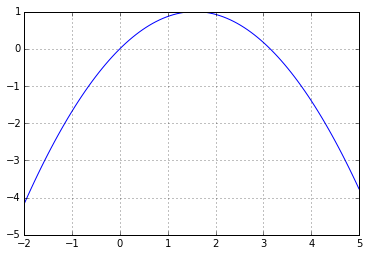

In [4]:
f = lambda x: -4/np.pi**2*x*(x-np.pi)
x = np.linspace(-2,5,100)
df = lambda x: 4*(np.pi - 2*x)/np.pi**2
plt.figure()
plt.grid()
plt.plot(x,f(x))

In [5]:
sieczne(6,5,f)

nr strzalu, x, f(x)
0 6 -6.95081317609
1 5 -3.76592064056
2 3.81756743798 -1.04586940708
3 3.3629178978 -0.30165287067
4 3.17863505506 -0.0477199575815
5 3.14400398132 -0.00307255435032
6 3.14162073283 -3.57519203139e-05
7 3.14159267513 -2.7419830677e-08


3.1415926751252776

In [6]:
sieczne(-6,-5,f)

nr strzalu, x, f(x)
0 -6 -22.2296877129
1 -5 -16.4983160879
2 -2.12140179221 -4.52497400948
3 -1.03351989685 -1.74882871375
4 -0.348210270342 -0.492496019172
5 -0.079561476584 -0.103866282168
6 -0.00776164049436 -0.0099068432033
7 -0.00019124920633 -0.000243520876197
8 -4.71308499578e-07 -6.00088709459e-07


-4.713084995781674e-07

In [7]:
newton(-3,f,df)

nr strzalu, x, f(x)
1 -3 -7.46728124533
2 -0.984511161353 -1.6463457272
3 -0.189656671716 -0.256056325672
4 -0.0102160220003 -0.0130497415953
5 -3.30064169296e-05 -4.20255167916e-05
6 -3.46767002462e-10 -4.41517460393e-10


-3.4676700246205833e-10

In [8]:
newton(6,f,df)

nr strzalu, x, f(x)
1 6 -6.95081317609
2 4.06393594155 -1.51914661868
3 3.31220426632 -0.229026610831
4 3.14995035133 -0.0106696608532
5 3.14161477021 -2.81599584743e-05
6 3.14159265375 -1.98240439356e-10


3.141592653745491

Metoda bisekcji

In [9]:
def bisekcja(a,b,f,max_num=100,sigma = 1e-5, eps = 1e-5):
    fa = f(a)
    fb = f(b)
    e = b-a
    if np.sign(fa) == np.sign(fb):
        print "Zle dane"
    for k in range(max_num):
        e = e/2
        c = a + e
        fc = f(c)
        if np.abs(e) < sigma or np.abs(fc) < eps:
            break
        if np.sign(fc) != np.sign(fa):
            b, fb = c, fc
        else:
            a, fa = c, fc
    return a
        

In [10]:
bisekcja(-5,2,f)

-1

In [11]:
bisekcja(5,2,f)

4

Metoda strzału

In [12]:
from __future__ import division

In [13]:
# form mzp6.ipnyb
class SystemSolver():
    def __init__(self,updates = None):
        if isinstance(updates,list):
            max_len = max([len(x) for x in updates])
            [x.extend([0]*(max_len-len(x))) for x in updates]
            self.updates = np.asarray(updates, dtype = np.float64)
        else:
            self.updates = updates
        
    @property
    def update_count(self):
        return min(self.updates.shape)-1
    
    def __call__(self,tn,yn,functions,h):
        k = np.zeros(shape=(self.update_count,len(functions)))
        for i in range(self.update_count):
            a = self.updates[i,0]
            b = self.updates[i,1:]
            upd = np.sum(b[:,np.newaxis]*k,axis = 0)
            for j in range(len(functions)):
                k[i,j]= h * functions[j](tn+a*h, yn+upd)
        c = self.updates[self.update_count,1:]
        return np.sum(c[:,np.newaxis]*k, axis = 0)

In [14]:
runge_kutta = SystemSolver([[0],
                            [1/3,1/3],
                            [2/4,-1/3,1],
                            [1,1,-1,1],
                            [0,1/8,3/8,3/8,1/8]])

In [23]:
odes = [lambda t,ys: ys[1],lambda t,ys: 400*ys[0] - 401*np.sin(t)]

In [24]:
def shoot(method,functions,y_0s,x,step):
    y = np.zeros(shape=(len(y_0s),)+x.shape)
    y[:,0] = y_0s
    for i in range(len(x)-1):
        y[:,i+1] = y[:,i] + method(tn=x[i],
                                   yn=y[:,i],
                                   functions = functions,
                                   h=step)
    return y

In [25]:
A = [2,3,4,5]
step = 0.1

In [26]:
def f(x, end, step=0.1):
    t = np.linspace(0,2,2/step)
    y = shoot(method=runge_kutta,
          functions=odes,
          y_0s=[0,x],
          x = t,
          step = step)
    return y

In [27]:
def f1(x):
    return f(x,2)[0,-1] - np.sin(2)

In [31]:
sieczne(0,1,f1)

nr strzalu, x, f(x)
0 0 -2.70095552108e+14
1 1 1.48768275261e+13
2 0.947795545852 0.00137009980303
3 0.947795545852 0.00137009980303


0.94779554585177517

## Zadanie 2

Metoda strzału + metoda siecznych

a =  2
nr strzalu, x, f(x)
0 0 -2.70095552108e+14
1 1 1.48768275261e+13
2 0.947795545852 -0.0032545820646
3 0.947795545852 -0.0032545820646
Znaleziony pierwiastek:  0.947795545852
a =  3
nr strzalu, x, f(x)
0 0 -2.70095552108e+14
1 1 1.48768275261e+13
2 0.947795545852 -0.0162765007059
3 0.947795545852 0.0243971220055
Znaleziony pierwiastek:  0.947795545852
a =  4
nr strzalu, x, f(x)
0 0 -2.70095552108e+14
1 1 1.48768275261e+13
2 0.947795545852 0.0101137240884
3 0.947795545852 0.0101137240884
Znaleziony pierwiastek:  0.947795545852
a =  5
nr strzalu, x, f(x)
0 0 -2.70095552108e+14
1 1 1.48768275261e+13
2 0.947795545852 0.00137009980303
3 0.947795545852 0.00137009980303
Znaleziony pierwiastek:  0.947795545852


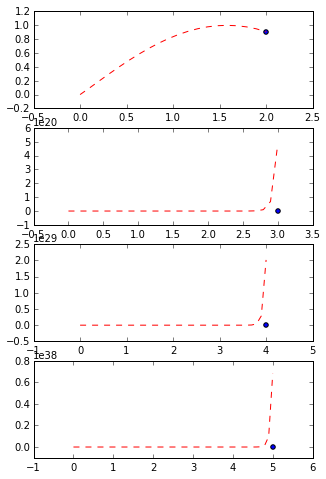

In [29]:
plt.figure(figsize=(5,len(A)*2))
for k,a in enumerate(A):
    print "a = ", a
    x = np.linspace(0,a,a/step)
    def f1(x):
        return f(x,a)[0,-1]-np.sin(a)
    root = sieczne(0,1,f1)
    print "Znaleziony pierwiastek: ", root
    y = shoot(method=runge_kutta,
          functions=odes,
          y_0s=[0,root],
          x = x,
          step = step)
    plt.subplot(len(A),1,k+1)
    plt.plot(x,y[0,:],linestyle='--',color = 'red')
    plt.scatter([a],[np.sin(a)])
plt.show()

## Zadanie 3

In [49]:
odes = [lambda t,ys: ys[1], lambda t,ys: ys[1]**2 + ys[0]**2 - ys[0] - 1]

In [50]:
def f(x, a, step=0.1):
    t = np.linspace(0,a,a/step)
    y = shoot(method=runge_kutta,
          functions=odes,
          y_0s=[0.5,x],
          x = t,
          step = step)
    return y

Metoda strzału + siecznych

nr strzalu, x, f(x)
0 0 -0.414813616079
1 1 nan
2 nan nan
3 nan nan
4 nan nan
5 nan nan
6 nan nan
7 nan nan
8 nan nan
9 nan nan
10 nan nan
11 nan nan
12 nan nan
13 nan nan
14 nan nan
15 nan nan
16 nan nan
17 nan nan
18 nan nan
19 nan nan
20 nan nan
21 nan nan
22 nan nan
23 nan nan
24 nan nan
25 nan nan
26 nan nan
27 nan nan
28 nan nan
29 nan nan
30 nan nan
31 nan nan
32 nan nan
33 nan nan
34 nan nan
35 nan nan
36 nan nan
37 nan nan
38 nan nan
39 nan nan
40 nan nan
41 nan nan
42 nan nan
43 nan nan
44 nan nan
45 nan nan
46 nan nan
47 nan nan
48 nan nan
49 nan nan
50 nan nan
51 nan nan
52 nan nan
53 nan nan
54 nan nan
55 nan nan
56 nan nan
57 nan nan
58 nan nan
59 nan nan
60 nan nan
61 nan nan
62 nan nan
63 nan nan
64 nan nan
65 nan nan
66 nan nan
67 nan nan
68 nan nan
69 nan nan
70 nan nan
71 nan nan
72 nan nan
73 nan nan
74 nan nan
75 nan nan
76 nan nan
77 nan nan
78 nan nan
79 nan nan
80 nan nan
81 nan nan
82 nan nan
83 nan nan
84 nan nan
85 nan nan
86 nan nan
87 nan nan
88 nan nan
89 

d:\anac\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
d:\anac\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
d:\anac\lib\site-packages\IPython\kernel\__main__.py:21: RuntimeWarning: invalid value encountered in absolute
d:\anac\lib\site-packages\IPython\kernel\__main__.py:30: RuntimeWarning: invalid value encountered in absolute


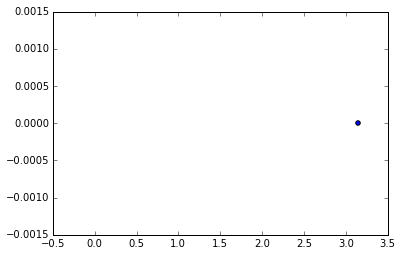

In [51]:
plt.figure()
a = np.pi
fa = -0.5
def f1(x):
    return f(x,a)[0,-1]-fa
root = sieczne(0,1,f1)
print "Znaleziony pierwiastek: ", root
x = np.linspace(0,a,a/step)
y = shoot(method=runge_kutta,
          functions=odes,
          y_0s=[0,root],
          x = x,
          step = step)
plt.plot(x,y[0,:],linestyle='--',color = 'red')
plt.scatter([a],[np.sin(a)])
plt.show()

Metoda strzału + metoda newtona

nr strzalu, x, f(x)
1 1 1.44631517635
2 5.47398134064 nan
3 nan nan
4 nan nan
5 nan nan
6 nan nan
7 nan nan
8 nan nan
9 nan nan
10 nan nan
11 nan nan
12 nan nan
13 nan nan
14 nan nan
15 nan nan
16 nan nan
17 nan nan
18 nan nan
19 nan nan
20 nan nan
21 nan nan
22 nan nan
23 nan nan
24 nan nan
25 nan nan
26 nan nan
27 nan nan
28 nan nan
29 nan nan
30 nan nan
31 nan nan
32 nan nan
33 nan nan
34 nan nan
35 nan nan
36 nan nan
37 nan nan
38 nan nan
39 nan nan
40 nan nan
41 nan nan
42 nan nan
43 nan nan
44 nan nan
45 nan nan
46 nan nan
47 nan nan
48 nan nan
49 nan nan
50 nan nan
51 nan nan
52 nan nan
53 nan nan
54 nan nan
55 nan nan
56 nan nan
57 nan nan
58 nan nan
59 nan nan
60 nan nan
61 nan nan
62 nan nan
63 nan nan
64 nan nan
65 nan nan
66 nan nan
67 nan nan
68 nan nan
69 nan nan
70 nan nan
71 nan nan
72 nan nan
73 nan nan
74 nan nan
75 nan nan
76 nan nan
77 nan nan
78 nan nan
79 nan nan
80 nan nan
81 nan nan
82 nan nan
83 nan nan
84 nan nan
85 nan nan
86 nan nan
87 nan nan
88 nan nan
89 

d:\anac\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':
d:\anac\lib\site-packages\IPython\kernel\__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
d:\anac\lib\site-packages\IPython\kernel\__main__.py:6: RuntimeWarning: invalid value encountered in absolute
d:\anac\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: invalid value encountered in absolute


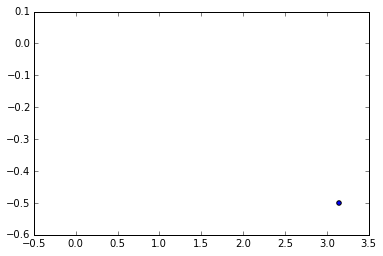

In [44]:
plt.figure()

x = np.linspace(0,a,a/step)
def f1(x):
    return f(x,a)[0,-1]-fa
def df1(x):
    return f(x,a)[1,-1]
root = newton(1,f1,df1)
print "Znaleziony pierwiastek: ", root
y = shoot(method=runge_kutta,
          functions=odes,
          y_0s=[0,root],
          x = x,
          step = step)
plt.plot(x,y[0,:],linestyle='--',color = 'red')
plt.scatter([a],[fa])
plt.show()